# Data mining practice example

####  

#### This notebook is a tutorial example for data mining practice

### Topics covered
- Exploratory data analysis
- Data analysis with machine learning
- Interpreting the result & Decision making based on the analysis

####  

## [Data]

#### Overview
- Human resource dataset about eary left employees
- 10 variables, including `left` variable which indicates the employee resigned or not

#### Available link
- Unfornunately, original link for the dataset is not available now.
- But there are few links that provide same dataset. i.e. https://www.kaggle.com/liujiaqi/hr-comma-sepcsv

####  

## [Problem]

### What characteristics do early left employees have?
### What should we do to prevent early left?

####  

## [Step 1] Exploratory data analysis

#### Load data

In [1]:
import pandas as pd
hr_data = pd.read_csv('data/HR.csv')

In [2]:
hr_data.shape

(14999, 10)

#### Check which variables are in the dataset

In [3]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

#### Check types of each variable

In [4]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

#### Print data table

In [5]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Select single column & get average

In [6]:
hr_data['satisfaction_level'].head()

0    0.38
1    0.80
2    0.11
3    0.72
4    0.37
Name: satisfaction_level, dtype: float64

In [7]:
hr_data['satisfaction_level'].mean()

0.6128335222348166

#### Check set of values which categorical variable can take

In [8]:
hr_data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
hr_data['number_project'].unique()

array([2, 5, 7, 6, 4, 3])

#### Select rows with given condition

In [10]:
hr_data.loc[hr_data['sales'] == 'IT'].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
61,0.11,0.93,7,308,4,0,1,0,IT,medium
62,0.10,0.95,6,244,5,0,1,0,IT,medium
63,0.36,0.56,2,132,3,0,1,0,IT,medium
64,0.11,0.94,6,286,4,0,1,0,IT,medium
65,0.81,0.70,6,161,4,0,1,0,IT,medium


In [11]:
hr_data.loc[hr_data['last_evaluation'] > 0.95].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
8,0.89,1.00,5,224,5,0,1,0,sales,low
17,0.78,0.99,4,255,6,0,1,0,sales,low
59,0.85,1.00,4,225,5,0,1,0,technical,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
70,0.74,0.99,2,277,3,0,1,0,IT,medium


#### Get summary statistics

In [12]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### `describe()` shows statistics only for numerical variables if data is mixed type.
#### We can check summary statistics for categorical variables by applying `describe()` to categorical variables only.

In [13]:
hr_data[['sales','salary']].describe()

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


#### Summary statistics gives useful information about data, but we can go deeper with data visualization.
#### Also, we can easily misinterpret the data without visualization(Well-known [example](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) for the importance of data visualization).

#### There are several python libraries for data visualization (If you want some more information, check [here](https://blog.modeanalytics.com/python-data-visualization-libraries/)).
#### Here, we exploit `matplotlib` and `seaborn` libraries for visualization.

In [17]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
# option for displaying figure on Jupyter notebook
%matplotlib inline
# option for adjusting default size of the figure
matplotlib.rcParams['figure.figsize'] = (20, 5)

#### We can visualize distribution of continuous varaibles with `histogram`, and `countplot` for categorical / discrete variables.

#### - Plotting Histogram

#### Use `hist()` of `pyplot`

##### Distribution of `satisfaction_level`

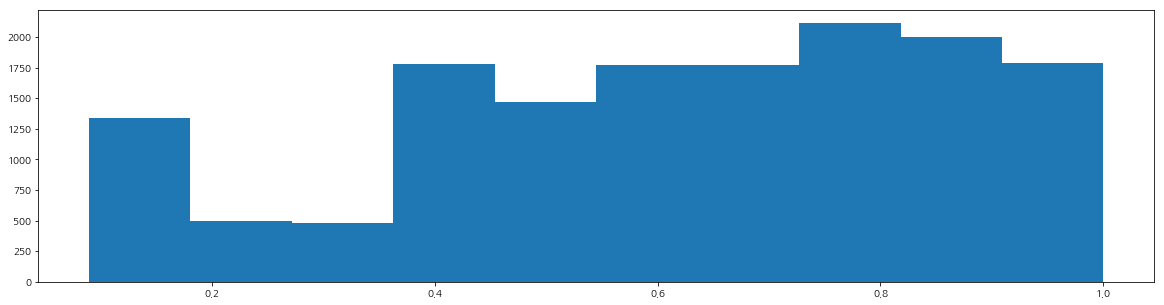

In [18]:
_ = plt.hist(hr_data['satisfaction_level'])

##### The number of bin can be adjusted with `bins` argument.

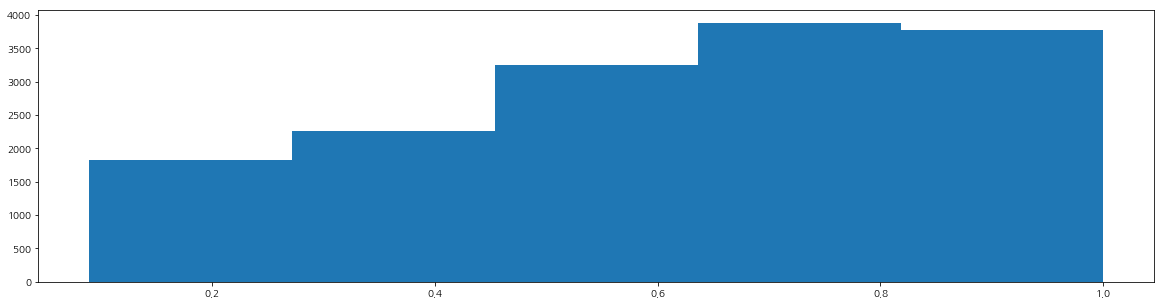

In [19]:
_ = plt.hist(hr_data['satisfaction_level'], bins=5)

##### Distribution of `average_montly_hours`

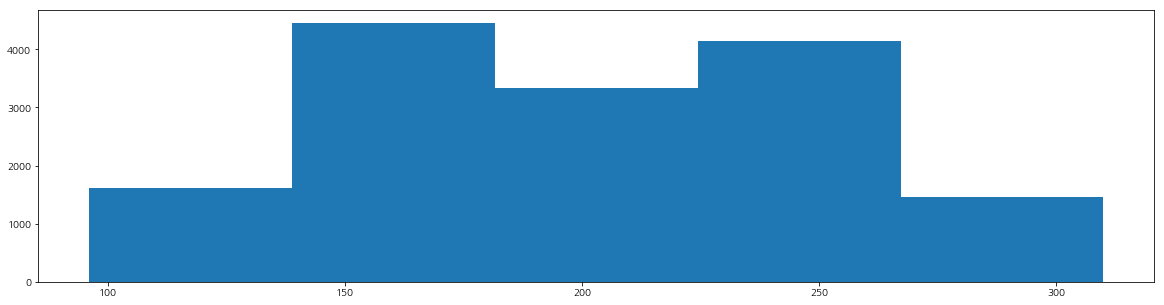

In [20]:
_ = plt.hist(hr_data['average_montly_hours'], bins=5)

##### Compare distribution of `satisfaction_level` between class 1(left) / 0(not left)

##### `alpha` argument adjusts the transparency of the diagram.
##### We can plot overlapped histrograms by adjusting `alpha` argument.

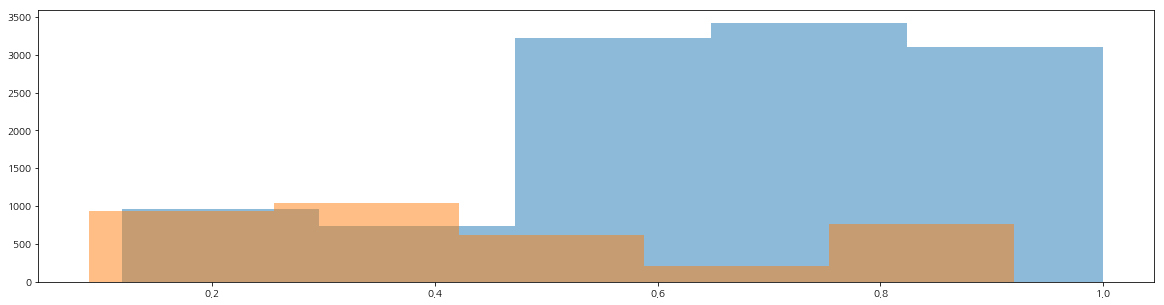

In [21]:
_ = plt.hist(hr_data.loc[hr_data['left']==0,'satisfaction_level'], bins=5, alpha=0.5)
_ = plt.hist(hr_data.loc[hr_data['left']==1,'satisfaction_level'], bins=5, alpha=0.5)

##### Compare distribution of `average_montly_hours` between class 1(left) / 0(not left)

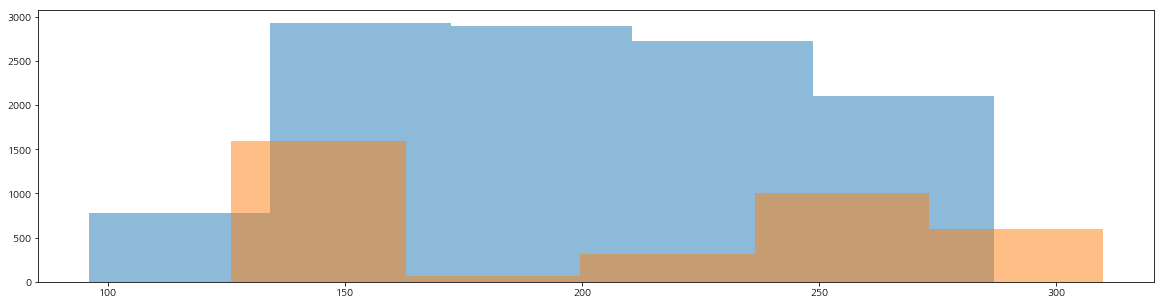

In [22]:
_ = plt.hist(hr_data.loc[hr_data['left']==0,'average_montly_hours'], bins=5, alpha=0.5)
_ = plt.hist(hr_data.loc[hr_data['left']==1,'average_montly_hours'], bins=5, alpha=0.5)

#### - Plotting Countplot

#### Use `countplot()` of `seaborn` library

##### Count of rows by `time_spend_compnay` variable

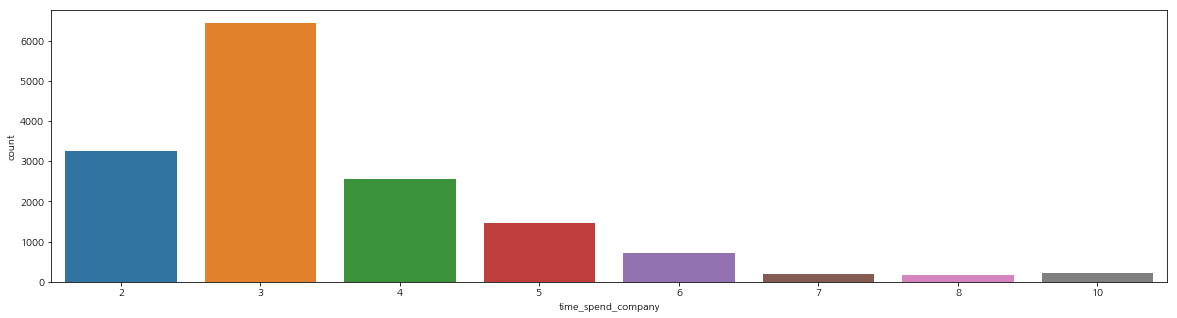

In [23]:
sns.countplot(x='time_spend_company', data=hr_data)

##### Count of rows by `sales` variable (The number of employee by department)

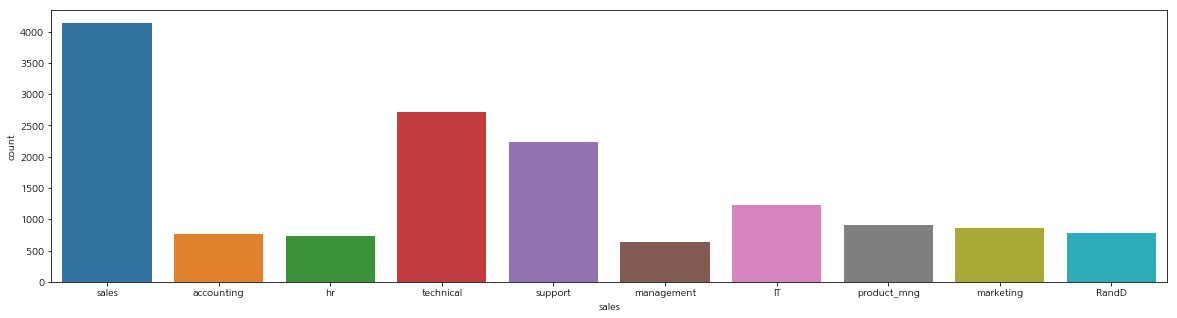

In [24]:
sns.countplot(x='sales', data=hr_data)

##### Compare proportion of `left` by `sales` variable

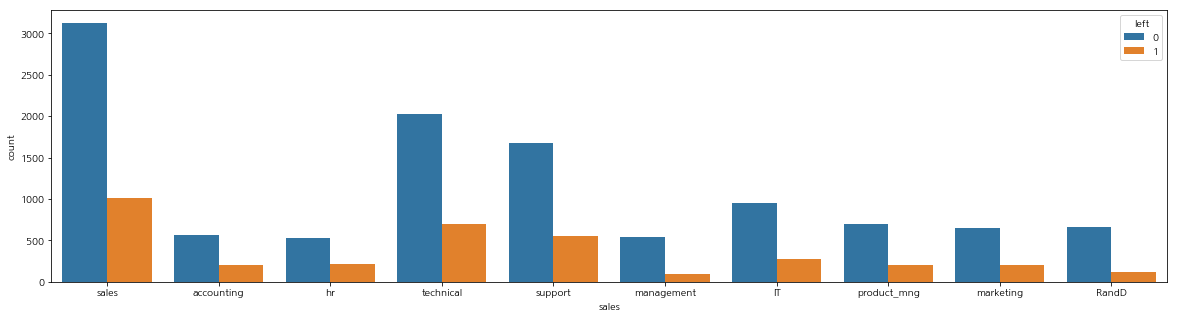

In [25]:
sns.countplot(x='sales', hue='left', data=hr_data)

###### Distribution of `salary` variable

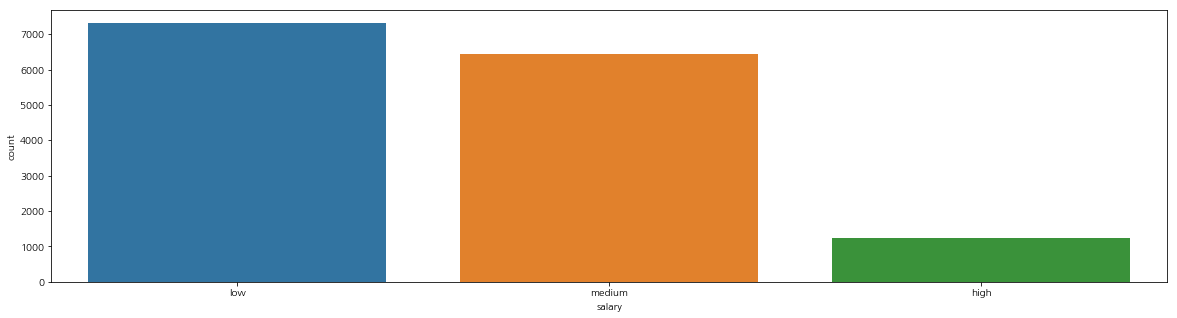

In [26]:
sns.countplot(x='salary', data=hr_data)

##### Proportion of `left` by each level of `salary` variable. (Check `hue` argument)

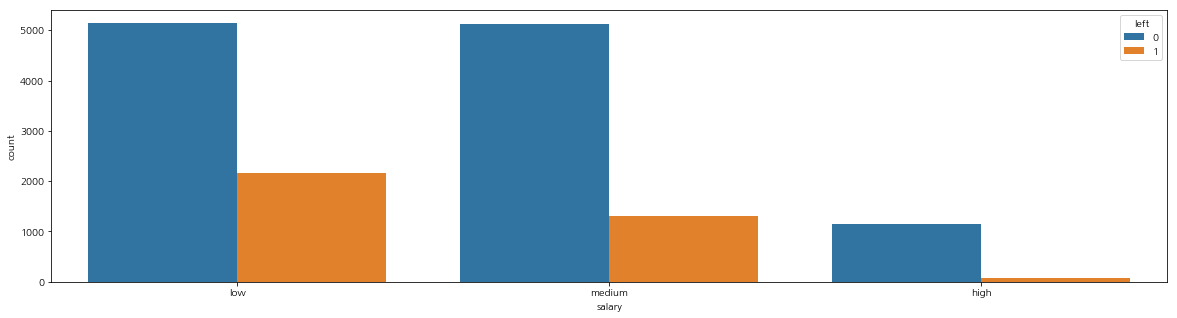

In [27]:
sns.countplot(x='salary', hue='left', data=hr_data)

#### Correlation between features

In [28]:
hr_data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


##### Above table has low readability. Let's use heatmap plot.

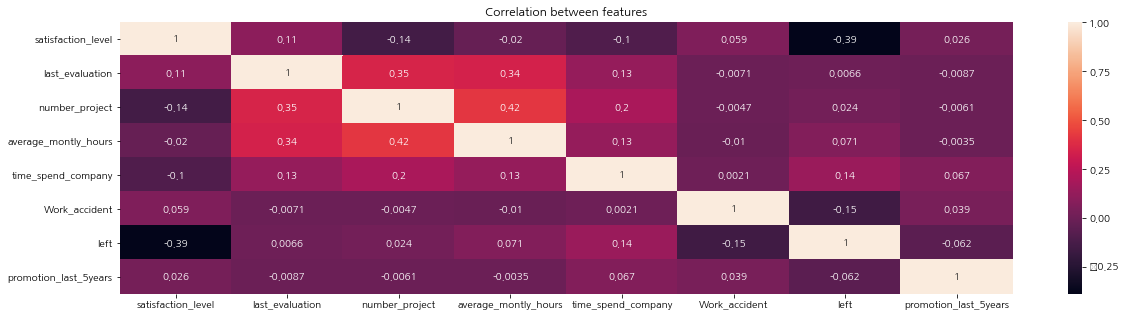

In [29]:
correlation = hr_data.corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation between features')

#### `Left` variable is negatively correlated with `satisfaction_level` while postively correlated with `time_spend_company`.
#### (It conforms to common sense)

#   

## [Step 2] Data analysis with machine learning

#####  

#### Exploratory data analysis provide useful informations, but this is not sufficient because
#### 1) It is hard to manually visualize and investigate relations between variables when the number of variable is quite large.
#### 2) It becomes much harder to find patterns in data if there are interactions between variables.

####  

#### By exploiting machine learning model, We can
#### 1) Find & Quantify patterns exsit in data
#### 2) Validate whether such patterns can be generalized or not,
#### 3) Analyze data in multivariate view.
#### In brief, modelling can be an effective way to understand the data.

####  

### - Data preprocessing

#### Machine learning model can only handle numerical data. Categorical variables have to be numerized.

In [41]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
numerical_data = hr_data[['satisfaction_level', 'last_evaluation', 'number_project',
                          'average_montly_hours', 'time_spend_company']]

In [36]:
categorical_data = hr_data[['promotion_last_5years', 'Work_accident', 'sales', 'salary']]

In [37]:
class_variable = hr_data['left']

##### `pd.get_dummies()` convert caterogorical variables to numerical variables by dummy coding as below.

In [38]:
pd.get_dummies(categorical_data).head()

,promotion_last_5years,Work_accident,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Replace categorical variables with dummy variables.

In [39]:
hr_data_dummy_coded = pd.concat([numerical_data, pd.get_dummies(categorical_data), class_variable], axis=1)

#### Separate input / target variable

In [40]:
X = hr_data_dummy_coded.drop('left', axis=1)

In [41]:
y = hr_data_dummy_coded['left']

In [42]:
print(X.shape, y.shape)

(14999, 20) (14999,)


#### Split training / validation dataset
##### If you are not familiar with the concept of train/validation/test set, see [here](https://en.wikipedia.org/wiki/Training,_test,_and_validation_sets).

In [47]:
from sklearn.cross_validation import train_test_split

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

In [49]:
print(X_train.shape, y_train.shape)

(10499, 20) (10499,)


In [50]:
print(X_val.shape, y_val.shape)

(4500, 20) (4500,)


#### Try logistic regression for classification

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression()

In [53]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
lr.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

#### Evaluate performace of the model

In [55]:
from sklearn.metrics import accuracy_score

##### Performance at training set

In [56]:
accuracy_score(y_train, lr.predict(X_train))

0.78950376226307273

##### Performance at validation set

In [57]:
accuracy_score(y_val, lr.predict(X_val))

0.79866666666666664

#### By the way, how well does this model perform?
#### Accuracy of 79.9% looks not that bad.

#### Compute proportion of class 1 (left)

In [58]:
y.mean()

0.2380825388359224

In [59]:
1 - y.mean()

0.7619174611640775

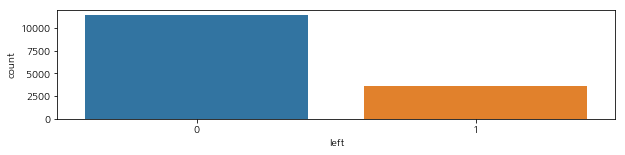

In [60]:
plt.figure(figsize=(10,2))
sns.countplot(x='left',data=hr_data)

#### Model can achieve about 76.2% accuracy with just guessing class 0

#### Considering the proportion of class 1 / 0, we can conclude that logistic regresison model learned nearly nothing.

#### There are another evaluation metrics, such as precision and recall.

##### For details about various evaluation metrics, read [here](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers).

In [61]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [62]:
precision_score(y_val, lr.predict(X_val))

0.6225806451612903

##### Only 62% of the predicted class 1 was actually class 1.

In [63]:
recall_score(y_val, lr.predict(X_val))

0.36483931947069942

##### Only 36% of the (actual) class 1 was retrived by the model.

In [64]:
from sklearn.metrics import f1_score

##### f1-score is the harmonic average of the precision and recall.

In [65]:
f1_score(y_val, lr.predict(X_val))

0.46007151370679383

#### Linear classifier seems not working.
#### Let's try with decision tree, which is a non-linear classifier.

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt = DecisionTreeClassifier(max_depth=8)

In [68]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
accuracy_score(y_train, dt.predict(X_train))

0.98371273454614727

In [70]:
accuracy_score(y_val, dt.predict(X_val))

0.98066666666666669

In [71]:
precision_score(y_val, dt.predict(X_val))

0.98116947472745297

In [72]:
recall_score(y_val, dt.predict(X_val))

0.93572778827977321

In [74]:
f1_score(y_val, dt.predict(X_val))

0.9579100145137881

#### Non-linear model performs much better. It seems there exist non-linear relation between input variables and class variable.

### Let's visualize learned decision tree.

In [75]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pydot

In [76]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
dt_image_binary = graph.create_png()

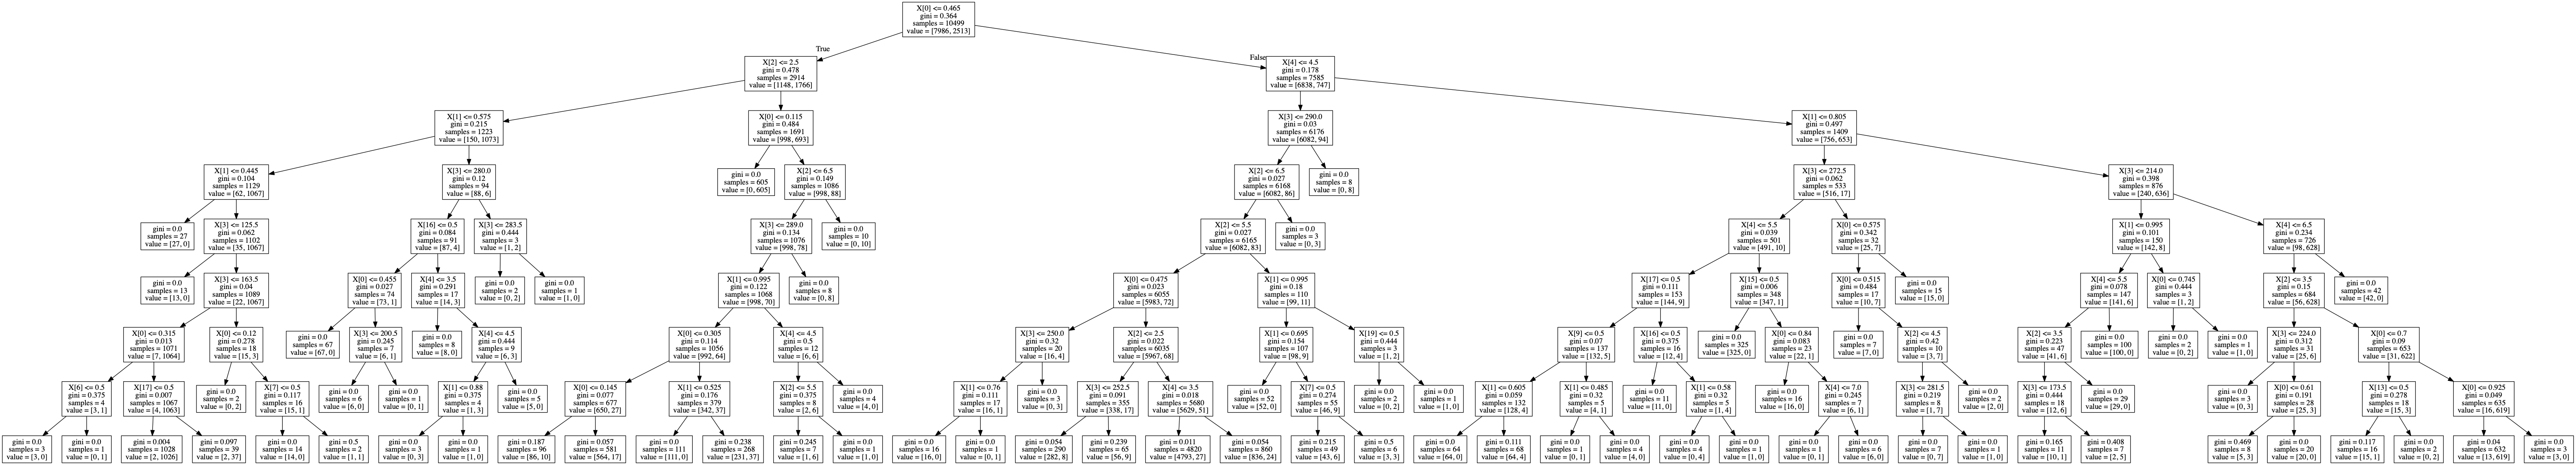

In [77]:
Image(dt_image_binary)

### We can make the diagram more readable by adjusting few options.

In [78]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, 
                feature_names=X.columns, proportion=True, filled=True, rounded=True, precision=2, impurity=False)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
dt_image_binary = graph.create_png()

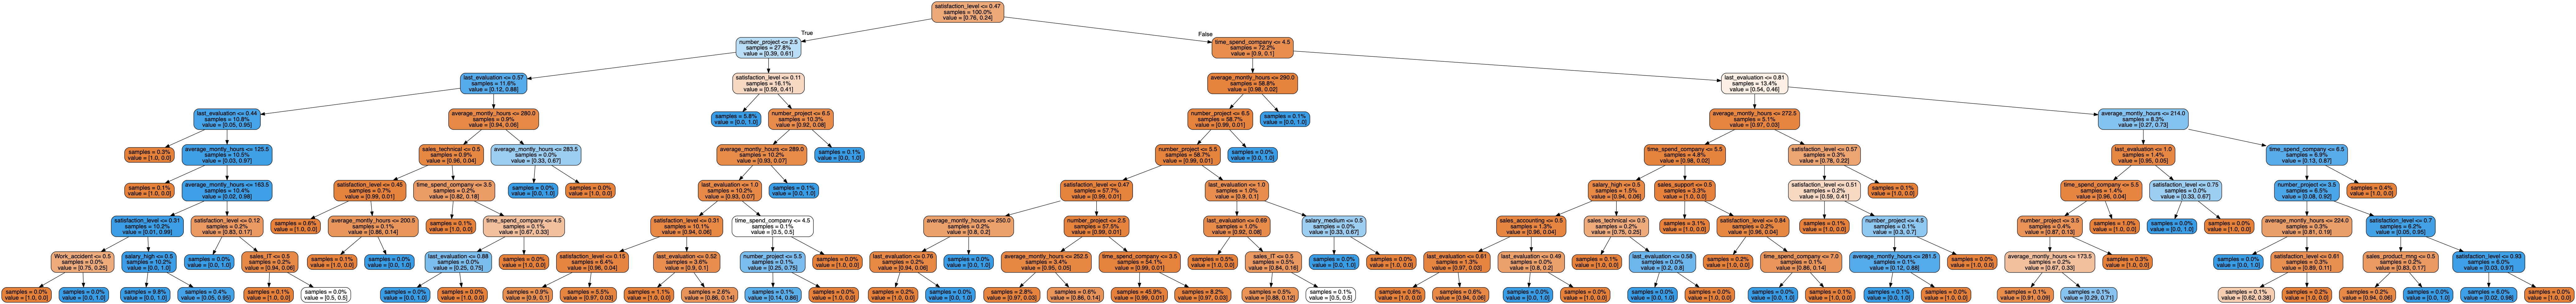

In [79]:
Image(dt_image_binary)

#### However, it is hard to interpret the tree rules due to huge size of the tree.

#### To easily understand what model does, the model should have low complexity as well as have good classification performance.

#### Let's track the tradeoff between model complexity and classification performance of the tree model.

#### We can adjust the complexity of the tree model by `max_depth` option.

In [81]:
from sklearn.learning_curve import validation_curve

#### Get cross-validation score for each `max_depth`. (If you have no idea with `cross-validation`, see [here](https://www.kaggle.com/dansbecker/cross-validation))

In [83]:
import numpy as np

In [84]:
param_range = range(1,15)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), 
                                             X, y, 
                                             param_name='max_depth',
                                             param_range=param_range,
                                             cv=10,
                                             scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

#### Classfication performace by tree depth (Measured by 10-fold cross validation)

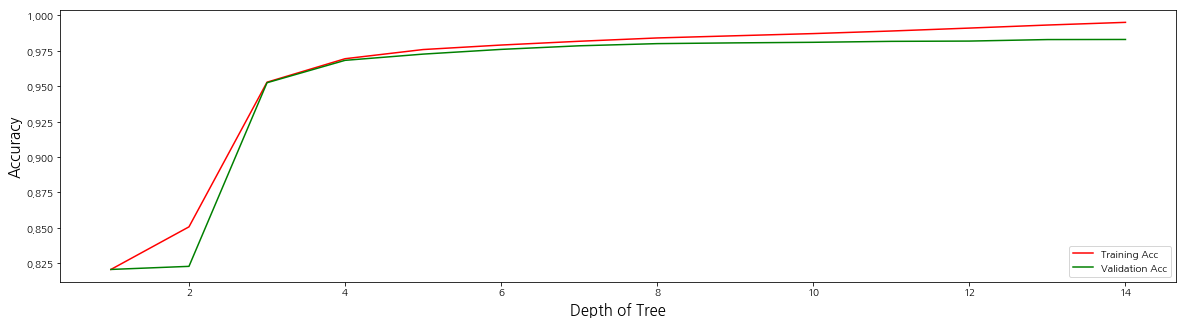

In [85]:
plt.xlabel('Depth of Tree', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(param_range, train_scores_mean, label='Training Acc', color='r')
plt.plot(param_range, test_scores_mean, label='Validation Acc', color='g')
plt.legend(loc='lower right')
plt.show()

#### Choose max_depth of the tree to be 3, which balances the performance and interpretability of the model

In [86]:
best_tree = DecisionTreeClassifier(max_depth=3)

In [87]:
best_tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
accuracy_score(y, best_tree.predict(X))

0.95259683978931931

In [89]:
print('Precision Score: ', precision_score(y, best_tree.predict(X)))
print('Recall Score: ', recall_score(y, best_tree.predict(X)))

Precision Score:  0.882762312634
Recall Score:  0.923550826099


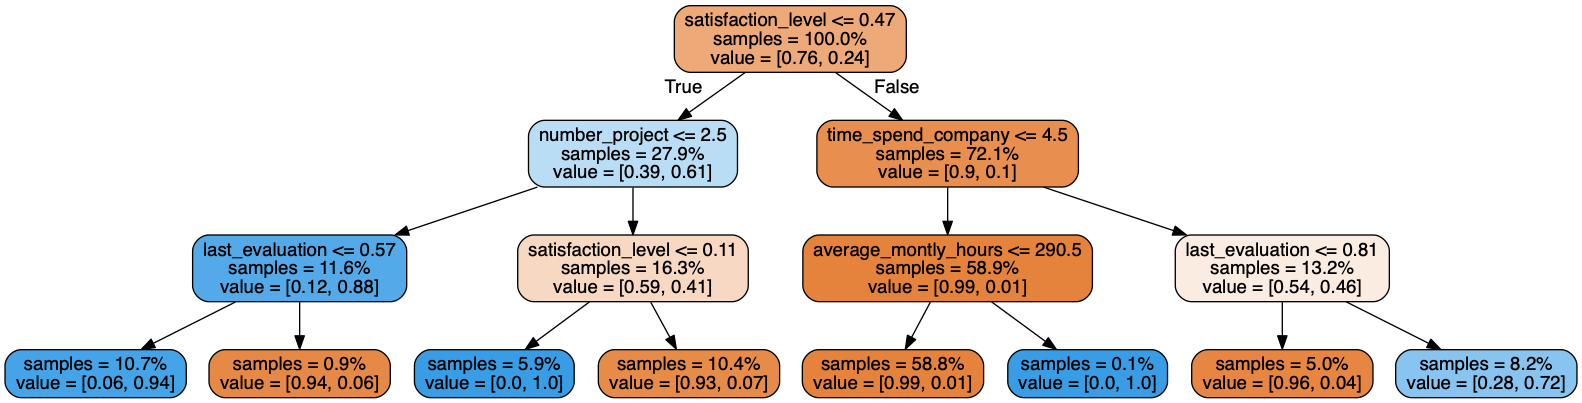

In [90]:
dot_data = StringIO()
export_graphviz(best_tree, out_file=dot_data, 
                feature_names=X.columns, proportion=True, filled=True, rounded=True, precision=2, impurity=False)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
dt_image_binary = graph.create_png()
Image(dt_image_binary)

#  

## [Step 3] Interpreting the result & Decision making based on the analysis

In [91]:
cond1 = X.satisfaction_level <= 0.47
cond2 = X.number_project <= 2.5
cond3 = X.time_spend_company <= 4.5
cond4 = X.last_evaluation <= 0.57
cond5 = X.satisfaction_level <= 0.11
cond6 = X.average_montly_hours <= 290.5
cond7 = X.last_evaluation <= 0.81

In [92]:
left_group1 = cond1 & cond2 & cond4
left_group2 = cond1 & np.bitwise_not(cond2) & cond5
left_group3 = np.bitwise_not(cond1) & cond3 & np.bitwise_not(cond6)
left_group4 = np.bitwise_not(cond1) & np.bitwise_not(cond3) & np.bitwise_not(cond7)

### Description for characteristcs of left groups

#### - Left group1: SATISFACTION_LEVEL <= 0.47, NUMBER_PROJECT <= 2.5, LAST_EVALUATION <= 0.57
#### - Left group2: SATISFACTION_LEVEL <= 0.11, NUMBER_PROJECT > 2.5
#### - Left group3: SATISFACTION_LEVEL > 0.47, TIME_SPEND_COMPANY <= 4.5, AVERAGE_MONTLY_HOURS > 290.5
#### - Left group4: SATISFACTION_LEVEL > 0.47, TIME_SPEND_COMPANY > 4.5, LAST_EVALUATION > 0.81

#### Make variable indicating the left group

In [93]:
hr_data['left_group'] = 'not_left'
hr_data.loc[left_group1, 'left_group'] = 'left_group_1'
hr_data.loc[left_group2, 'left_group'] = 'left_group_2'
hr_data.loc[left_group3, 'left_group'] = 'left_group_3'
hr_data.loc[left_group4, 'left_group'] = 'left_group_4'

#### Visualize size of each left group
#### (Remind that `left_group` is a prediction value, not the actual one)

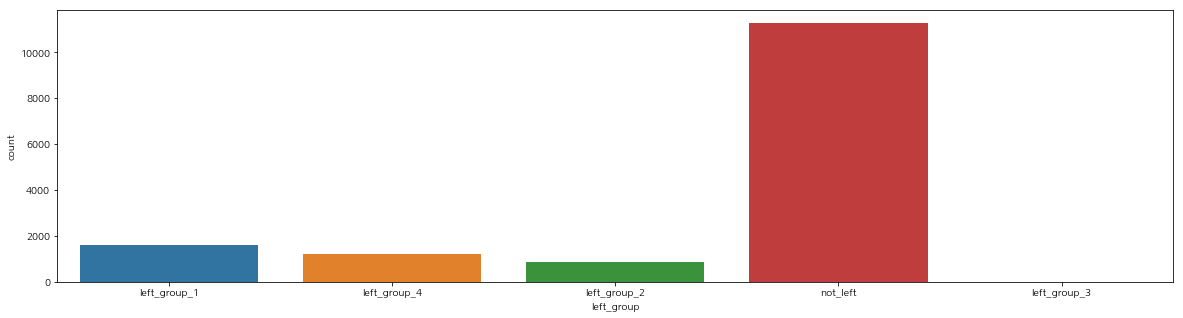

In [94]:
sns.countplot(x='left_group', data=hr_data)

#  

#### Employees who have high probability to early left(not left yet)

In [95]:
left_prob = best_tree.predict_proba(X)[:,1]
hr_data['left_prob'] = left_prob

In [96]:
hr_data.loc[(hr_data['left']==0) & (hr_data['left_prob'] >= 0.7)].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,left_group,left_prob
2011,0.34,0.39,2,136,3,0,0,0,sales,medium,left_group_1,0.944789
2012,0.48,0.94,5,255,6,0,0,0,accounting,medium,left_group_4,0.716491
2018,0.89,0.92,4,165,5,0,0,0,hr,medium,left_group_4,0.716491
2174,0.88,0.81,5,193,5,0,0,0,technical,medium,not_left,0.716491
2306,0.80,0.98,2,232,6,1,0,0,sales,low,left_group_4,0.716491


In [97]:
hr_data.loc[(hr_data['left']==0) & (hr_data['left_prob'] >= 0.7)].shape

(438, 12)

#### Actions are required to prevent them leaving. But it would be costly to take actions to all of them.

#### Let's define `priority` to take action as below, which balances the left probability and performance of the employee.

In [98]:
hr_data['priority'] = (3 * hr_data['last_evaluation'] + hr_data['left_prob']) / 4

#### Visualize the distribution of priority

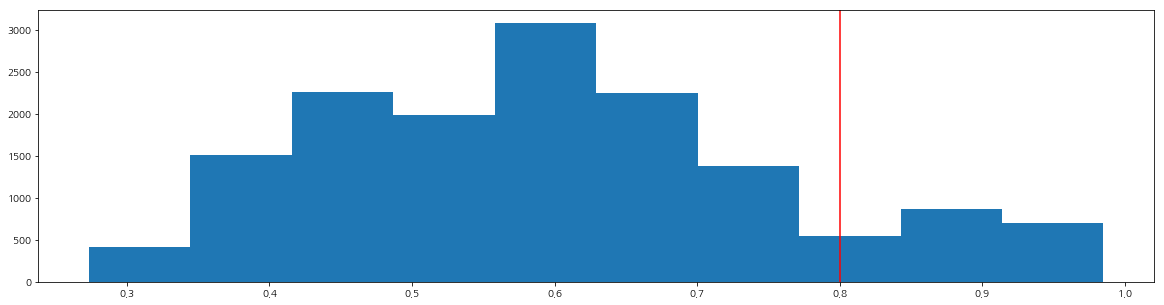

In [99]:
_ = plt.hist(hr_data['priority'])
plt.axvline(0.8, c='r')

#### Possible cutoff for taking action can be `prioirty=0.8`.

#### Finally, the target group is as below

In [100]:
target_group = hr_data.loc[(hr_data['left']==0) & (hr_data['priority'] > 0.8)]

In [101]:
target_group.shape

(315, 13)

In [102]:
target_group.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,left_group,left_prob,priority
2012,0.48,0.94,5,255,6,0,0,0,accounting,medium,left_group_4,0.716491,0.884123
2018,0.89,0.92,4,165,5,0,0,0,hr,medium,left_group_4,0.716491,0.869123
2306,0.80,0.98,2,232,6,1,0,0,sales,low,left_group_4,0.716491,0.914123
2415,0.92,0.97,4,238,5,1,0,0,support,medium,left_group_4,0.716491,0.906623
2429,0.47,0.86,4,169,6,0,0,0,IT,low,not_left,0.716491,0.824123


#### Visualize distribution of `left_group` within target group.

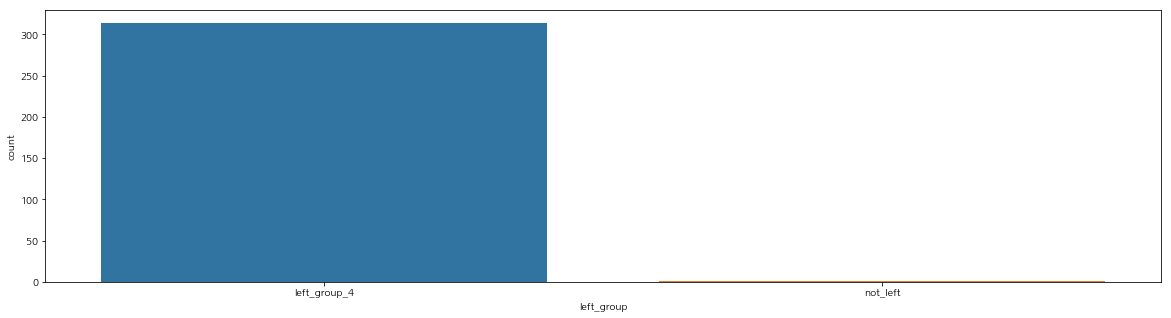

In [103]:
sns.countplot(x='left_group', data=target_group)

#### `left_group_4` type is dominant in target group

#### The characteristic of `left_group_4` is,
#### `SATISFACTION_LEVEL > 0.47, TIME_SPEND_COMPANY > 4.5, LAST_EVALUATION > 0.81`

#### Revisit distribution of `time_spend_company`.

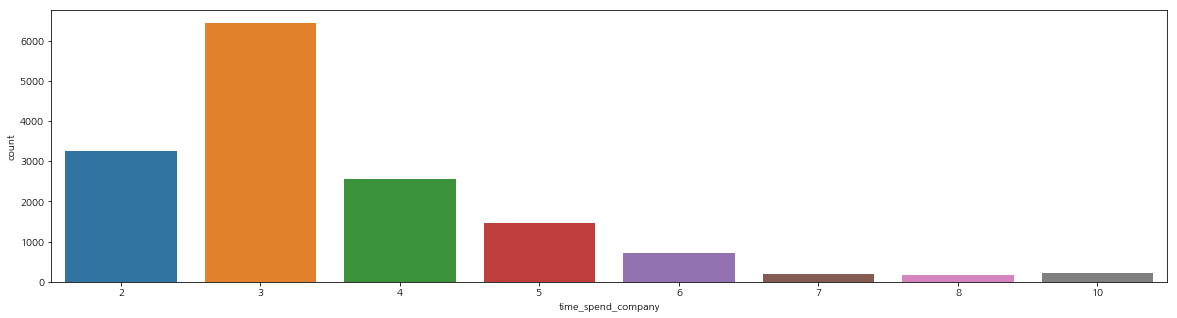

In [104]:
sns.countplot(x='time_spend_company', data=hr_data)

#### Target group spend much more times than average employees.

#### We can guess that they are competent employees suffering from heavy work and considering to leave the company!

#### Thus, one of the possible actions to prevent early left is adjusting the workload for target group.